In [1]:
# 📦 1. Installer les bibliothèques
!pip install scikit-learn pandas joblib

In [2]:
# 📚 2. Importer les bibliothèques
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib

In [3]:
# 🏭 3. Générer les données pour Machine de moulage
def generate_moulage_data(n=1000):
    data = []
    for _ in range(n):
        temp = np.random.normal(210, 10)
        pression = np.random.normal(90, 10)
        vib = np.random.normal(0.05, 0.01)

        if np.random.rand() < 0.05:
            temp += np.random.uniform(30, 50)
            pression -= np.random.uniform(15, 30)
            vib += np.random.uniform(0.1, 0.15)
            label = 1  # anomalie
        else:
            label = 0  # normal

        data.append([temp, pression, vib, label])

    return pd.DataFrame(data, columns=['temperature', 'pression', 'vibration', 'anomalie'])


In [4]:
# 🏭 4. Générer les données pour Machine de soufflage
def generate_soufflage_data(n=1000):
    data = []
    for _ in range(n):
        temp = np.random.normal(120, 10)
        pression = np.random.normal(28, 5)
        vib = np.random.normal(0.06, 0.01)

        if np.random.rand() < 0.05:
            temp -= np.random.uniform(20, 30)
            pression += np.random.uniform(15, 25)
            vib += np.random.uniform(0.15, 0.2)
            label = 1
        else:
            label = 0

        data.append([temp, pression, vib, label])

    return pd.DataFrame(data, columns=['temperature', 'pression', 'vibration', 'anomalie'])


In [5]:
# 🧪 5. Fonction pour entraîner un modèle
def train_model(df):
    X = df[['temperature', 'pression', 'vibration']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = IsolationForest(contamination=0.05)
    model.fit(X_scaled)

    return model, scaler

In [6]:
# ✅ 6. Générer les données
df_moulage = generate_moulage_data()
df_soufflage = generate_soufflage_data()

📊 Données - Machine de moulage


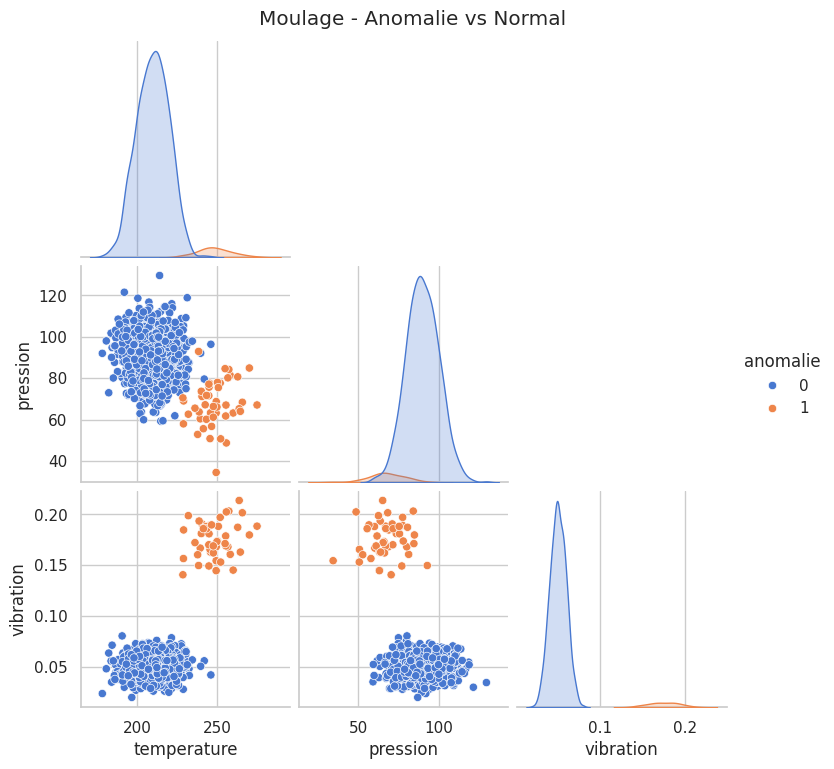

📊 Données - Machine de soufflage


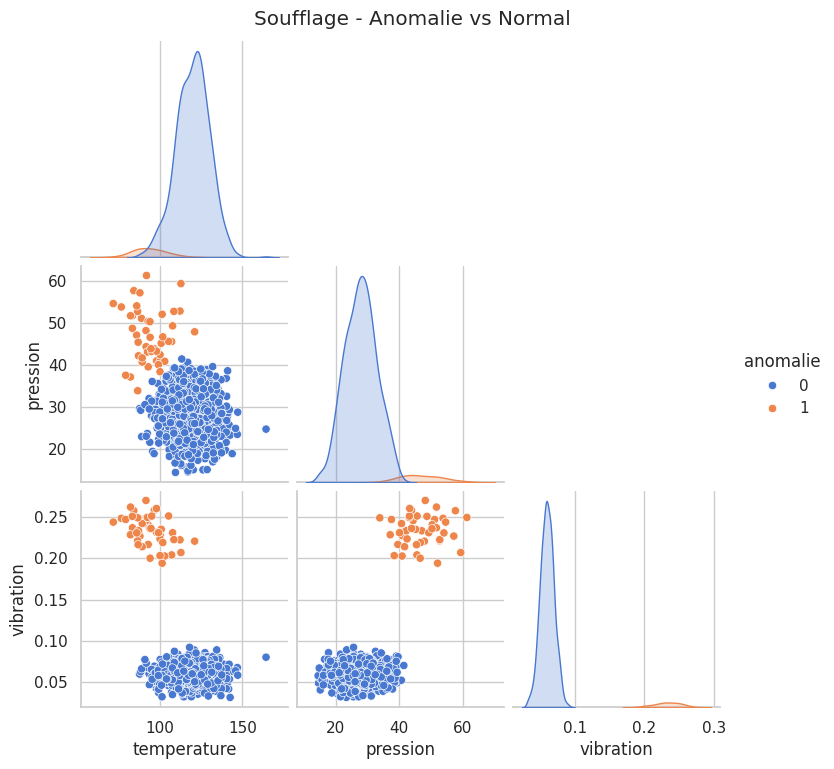

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration graphique
sns.set(style="whitegrid", palette="muted")

# 📈 Visualisation pour la machine de moulage
print("📊 Données - Machine de moulage")
sns.pairplot(df_moulage, hue="anomalie", corner=True)
plt.suptitle("Moulage - Anomalie vs Normal", y=1.02)
plt.show()

# 📈 Visualisation pour la machine de soufflage
print("📊 Données - Machine de soufflage")
sns.pairplot(df_soufflage, hue="anomalie", corner=True)
plt.suptitle("Soufflage - Anomalie vs Normal", y=1.02)
plt.show()


In [8]:
# ✅ 7. Entraîner les modèles
model_moulage, scaler_moulage = train_model(df_moulage)
model_soufflage, scaler_soufflage = train_model(df_soufflage)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os

# Chemin dans ton Drive
save_path = "/content/drive/MyDrive/model_inter_donnees"

# Crée le dossier s’il n'existe pas
os.makedirs(save_path, exist_ok=True)


In [11]:
joblib.dump(model_moulage, f"{save_path}/model_moulage.pkl")
joblib.dump(scaler_moulage, f"{save_path}/scaler_moulage.pkl")
joblib.dump(model_soufflage, f"{save_path}/model_soufflage.pkl")
joblib.dump(scaler_soufflage, f"{save_path}/scaler_soufflage.pkl")

print(f"✅ Modèles sauvegardés dans Google Drive ici : {save_path}")

✅ Modèles sauvegardés dans Google Drive ici : /content/drive/MyDrive/model_inter_donnees


In [13]:
import joblib

# Chemin vers le dossier dans Drive où tu as sauvegardé les modèles
drive_path = "/content/drive/MyDrive/model_inter_donnees/"

# Charger les modèles et scalers
model_moulage = joblib.load(drive_path + "model_moulage.pkl")
scaler_moulage = joblib.load(drive_path + "scaler_moulage.pkl")

model_soufflage = joblib.load(drive_path + "model_soufflage.pkl")
scaler_soufflage = joblib.load(drive_path + "scaler_soufflage.pkl")

print("✅ Modèles et scalers chargés avec succès depuis Google Drive.")

✅ Modèles et scalers chargés avec succès depuis Google Drive.


In [14]:
# Règles de suggestion
def generate_suggestion(machine, temp, pression, vib):
    if machine == "moulage":
        if temp > 250:
            return "Température trop élevée. Vérifiez le système de chauffage."
        elif pression < 60:
            return "Pression insuffisante. Contrôlez la pompe hydraulique."
        elif vib > 0.15:
            return "Vibration excessive. Une pièce mécanique peut être usée."
        else:
            return "Aucune action requise."
    elif machine == "soufflage":
        if temp < 90:
            return "Température trop basse. Réglez le four de préchauffage."
        elif pression > 40:
            return "Pression d’air trop élevée. Vérifiez le compresseur."
        elif vib > 0.18:
            return "Vibration anormale. Stabilisez la machine."
        else:
            return "Aucune action requise."


In [15]:
# Fonction de diagnostic IA + recommandation
def diagnostic(machine, temp, pression, vib, model, scaler):
    input_data = np.array([[temp, pression, vib]])
    input_scaled = scaler.transform(input_data)
    pred = model.predict(input_scaled)
    is_anomaly = (pred[0] == -1)

    if is_anomaly:
        result = "Anomalie détectée"
        suggestion = generate_suggestion(machine, temp, pression, vib)
    else:
        result = "Aucune anomalie"
        suggestion = "Aucune action requise."

    return {
        "machine": machine,
        "résultat": result,
        "suggestion": suggestion,
        "données": {
            "température": temp,
            "pression": pression,
            "vibration": vib
        }
    }


In [16]:
# Exemple pour machine de moulage
prediction1 = diagnostic(
    machine="moulage",
    temp=260,
    pression=55,
    vib=0.16,
    model=model_moulage,
    scaler=scaler_moulage
)
print("🔧 Résultat moulage:", prediction1)

# Exemple pour machine de soufflage
prediction2 = diagnostic(
    machine="soufflage",
    temp=85,
    pression=42,
    vib=0.21,
    model=model_soufflage,
    scaler=scaler_soufflage
)
print("🔧 Résultat soufflage:", prediction2)


🔧 Résultat moulage: {'machine': 'moulage', 'résultat': 'Anomalie détectée', 'suggestion': 'Température trop élevée. Vérifiez le système de chauffage.', 'données': {'température': 260, 'pression': 55, 'vibration': 0.16}}
🔧 Résultat soufflage: {'machine': 'soufflage', 'résultat': 'Anomalie détectée', 'suggestion': 'Température trop basse. Réglez le four de préchauffage.', 'données': {'température': 85, 'pression': 42, 'vibration': 0.21}}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
